In [1]:
from Scripts.function import load_processed,vennD
from Scripts import function as pf
import numpy as np
import pandas as pd
import seaborn as sns

# Edibility of mushrooms: how accurate is it when there are multiple best tellers #
----
I want to explore how good of an indicator the best tellers are when taken two at a time and how venn diagrams could tell if a particular statistic is useful or not.


In [2]:
df = pf.load_processed("../../data/raw/mushrooms.csv","../../data/processed/abijith.csv")
df

,Class,Cap Shape,Cap Surface,Cap Color,Bruises,Odor,Gill Attachment,Gill Spacing,Gill Size,Gill Color,...,Stalk Surface Below Ring,Stalk Color Above Ring,Stalk Color Below Ring,Veil Type,Veil Color,Ring Number,Ring Type,Spore Print Color,Population,Habitat
0,poisonous,convex,smooth,brown,True,pungent,free,close,narrow,black,...,smooth,white,white,partial,white,1,pendant,black,scattered,urban
1,edible,convex,smooth,yellow,True,almond,free,close,broad,black,...,smooth,white,white,partial,white,1,pendant,brown,numerous,grasses
2,edible,bell,smooth,white,True,anise,free,close,broad,brown,...,smooth,white,white,partial,white,1,pendant,brown,numerous,meadows
3,poisonous,convex,scaly,white,True,pungent,free,close,narrow,brown,...,smooth,white,white,partial,white,1,pendant,black,scattered,urban
4,edible,convex,smooth,gray,False,none,free,crowded,broad,black,...,smooth,white,white,partial,white,1,evanescent,brown,abundant,grasses
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,edible,knobbed,smooth,brown,False,none,attached,close,broad,yellow,...,smooth,orange,orange,partial,orange,1,pendant,buff,clustered,leaves
8120,edible,convex,smooth,brown,False,none,attached,close,broad,yellow,...,smooth,orange,orange,partial,brown,1,pendant,buff,several,leaves
8121,edible,flat,smooth,brown,False,none,attached,close,broad,brown,...,smooth,orange,orange,partial,orange,1,pendant,buff,clustered,leaves
8122,poisonous,knobbed,scaly,brown,False,fishy,free,close,narrow,buff,...,silky,white,white,partial,white,1,evanescent,white,several,leaves


# Exploratory Data Analysis(EDA) #
---
Description of dataset: Synthetic sample data based on 23 species of gilled mushroom pulled from The Audubon Society Field Guide to North American Mushrooms (1981). This data was generated for use as a training set for machine learning projects by UCI Machine Learning.

Furthermore, the data goes over the observable physical features of the hypothetical mushrooms, such as gill size and spacing, odor, cap color, and much more. The data provides 8124 samples, recording 23 different parameters.

**Features of the dataset:**

In [3]:
pf.describe_features(df)

Statistic description of dataset:
         Class Cap Shape Cap Surface Cap Color Bruises  Odor Gill Attachment  \
count     8124      8124        8124      8124    8124  8124            8124   
unique       2         6           4        10       2     9               2   
top     edible    convex       scaly     brown   False  none            free   
freq      4208      3656        3244      2284    4748  3528            7914   
mean       NaN       NaN         NaN       NaN     NaN   NaN             NaN   
std        NaN       NaN         NaN       NaN     NaN   NaN             NaN   
min        NaN       NaN         NaN       NaN     NaN   NaN             NaN   
25%        NaN       NaN         NaN       NaN     NaN   NaN             NaN   
50%        NaN       NaN         NaN       NaN     NaN   NaN             NaN   
75%        NaN       NaN         NaN       NaN     NaN   NaN             NaN   
max        NaN       NaN         NaN       NaN     NaN   NaN             NaN   

     

# Some Visualizations to help our understanding #
---

intersection of edible mushrooms with no odor and pendant ring type


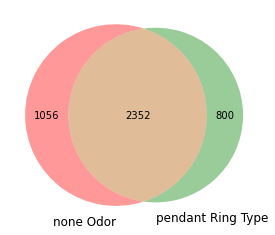

In [8]:
#def show_edibility_ratio(df):
#    return sum(df['']=='edible')/len(df['Class']=='edible')

#print(show_edibility_ratio(df))
pf.vennD('Odor', 'none', 'Ring Type','pendant','edible', df)
print('\033[1m'+"Edible mushrooms with no odor and pendant ring type:"+'\033[0m')

intersection of poisonous mushrooms with no odor and pendant ring type


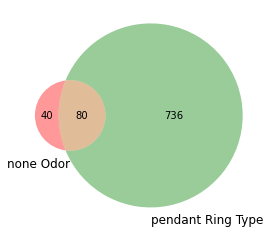

In [9]:
pf.vennD('Odor', 'none', 'Ring Type','pendant','poisonous', df)
print('\033[1m'+"Poisonous mushrooms with no odor and pendant ring type"+'\033[0m')

The Data indicates that the mushrooms with pendant rings are not a very good teller when it comes to edibility but mushrooms that have pendant ring type and have no Odor are highly edible (96.7% of mushroms with no odor and pendant ring type are edible.)

Edible mushrooms with Broad Gill Size and Crowded Gill Spacing:


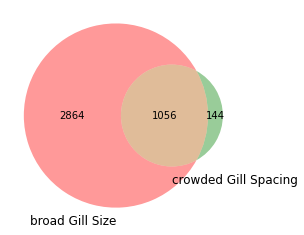

In [49]:
pf.vennD('Gill Size', 'broad', 'Gill Spacing','crowded','edible', df)
print('\033[1m'+"Edible mushrooms with Broad Gill Size and Crowded Gill Spacing:"+'\033[0m')

Poisonous mushrooms with Broad Gill Size and Crowded Gill Spacing:


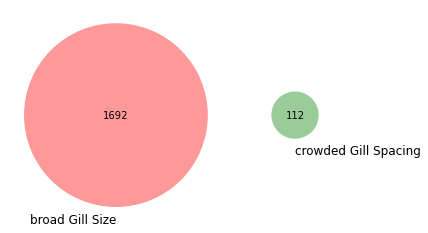

In [51]:
pf.vennD('Gill Size', 'broad', 'Gill Spacing','crowded','poisonous', df)
print('\033[1m'+"Poisonous mushrooms with Broad Gill Size and Crowded Gill Spacing:"+'\033[0m')

# Conclusions #
---
***96.7% of mushroms with no odor and pendant ring type are edible.** Although pendant ring type in not a very good teller on whether a mushroom is edible or not, when pendant ring type mushrooms have no odor they are most likely edible.   
***100% of mushrooms with both Broad Gill Size and Crowded Gill Spacing are edible.** Although neigther Broad Gill Size or Crowded Gill Spacing is a sure teller of whether a mushroom is edible or not on its own, It is evident that all mushrooms with both Broad Gill Size and Crowded Gill Spacing are edible.